# Homework 2 Solutions
# Part A: Titanic

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
# Read in the data
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Survived,Pclass,Sex,SibSp,ParCh,Fare,Embarked
0,1,"Braund, Mr. Owen Harris",0,3,male,1,0,7.2500,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",1,3,female,0,0,7.9250,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,1,0,53.1000,S
4,5,"Allen, Mr. William Henry",0,3,male,0,0,8.0500,S


In [3]:
# Remove the "Name" and "PassengerID" columns since we will not use them
df = df.drop(['PassengerId','Name'],axis=1)

In [4]:
# One-hot encoding
df = pd.get_dummies(df, drop_first=True, columns=["Sex","Embarked"])
df.head()

,Survived,Pclass,SibSp,ParCh,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,True,False,True
1,1,1,1,0,71.2833,False,False,False
2,1,3,0,0,7.9250,False,False,True
3,1,1,1,0,53.1000,False,False,True
4,0,3,0,0,8.0500,True,False,True


In [5]:
# Create the usual X and y arrays
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

### Questions A.1-A.3

In [6]:
# Train a logistic regression model
clf = LogisticRegression(penalty=None,max_iter=1000)
clf.fit(X,y)
print(clf.intercept_)
coef = dict(list(zip(clf.feature_names_in_, clf.coef_[0])))
print(coef)
clf.predict_proba([[1, 1, 2, 62.5, 0, 1, 0]])

[3.50797055]
{'Pclass': -0.8404613013017398, 'SibSp': -0.2342294959177283, 'ParCh': -0.07378754615516171, 'Fare': 0.002460992529539913, 'Sex_male': -2.7328495646713455, 'Embarked_Q': -0.2079151747142092, 'Embarked_S': -0.4696478825029262}


/opt/homebrew/Caskroom/miniconda/base/envs/mlba/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.09694834, 0.90305166]])

### Question A.4

In [7]:
df = pd.get_dummies(df, drop_first=True, columns=["ParCh"])
df.head()

,Survived,Pclass,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S,ParCh_1,ParCh_2,ParCh_3,ParCh_4,ParCh_5,ParCh_6
0,0,3,1,7.2500,True,False,True,False,False,False,False,False,False
1,1,1,1,71.2833,False,False,False,False,False,False,False,False,False
2,1,3,0,7.9250,False,False,True,False,False,False,False,False,False
3,1,1,1,53.1000,False,False,True,False,False,False,False,False,False
4,0,3,0,8.0500,True,False,True,False,False,False,False,False,False


In [8]:
# Create the usual X and y arrays
X = df.drop('Survived',axis=1)
y = df['Survived']

# Train a logistic regression model
clf = LogisticRegression(penalty=None, max_iter=1000)
clf.fit(X,y)
print(clf.intercept_)
coef = dict(list(zip(clf.feature_names_in_, clf.coef_[0])))
print(coef)

[3.32048256]
{'Pclass': -0.8288929084674715, 'SibSp': -0.3379977633448086, 'Fare': 0.0023073386795110515, 'Sex_male': -2.6933188659227603, 'Embarked_Q': -0.05174697890813379, 'Embarked_S': -0.3923536430460689, 'ParCh_1': 0.6730767362786145, 'ParCh_2': 0.3102363384640249, 'ParCh_3': 0.35193712925660436, 'ParCh_4': -9.979572354815444, 'ParCh_5': -1.612347066206588, 'ParCh_6': -6.66090104526336}


In [9]:
df = pd.read_csv('titanic.csv')
df['ParCh'].value_counts()

ParCh
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

# Part B: Framingham Study

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Loading in data, and one-hot encoding
df = pd.read_csv('framingham.csv')
df = pd.get_dummies(df, drop_first=True)
df

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD,Education_High school/GED,Education_Some college/vocational school,Education_Some high school
0,1,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,False,False,False
1,0,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,True,False,False
2,1,48,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0,False,False,True
3,0,61,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1,False,True,False
4,0,46,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1,50,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1,False,False,True
3654,1,51,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0,False,True,False
3655,0,52,0,0,0,0,0,0,269,133.5,83.0,21.47,80,107,0,True,False,False
3656,1,40,0,0,0,0,1,0,185,141.0,98.0,25.60,67,72,0,False,True,False


In [12]:
# Forming train and test sets via stratified splitting
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2023)

## Question B.1

### Part (a)

In [13]:
# Logistic Regression
clf = LogisticRegression(penalty=None,max_iter=10000)
clf.fit(X_train,y_train)
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

0.7693999755590859


### Part (b)

In [14]:
# Logistic Regression with L1 Penalty
clf = LogisticRegressionCV(Cs=np.logspace(-3,3,100),penalty='l1',max_iter=10000,solver='liblinear',cv=5,random_state=2023)
clf.fit(X_train,y_train)
print(clf.C_)
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

[0.30538555]
0.7646211336725046


### Part (c)

In [15]:
# Logistic Regression with L1 Penalty
clf = LogisticRegressionCV(Cs=np.logspace(-3,3,100),penalty='l2',max_iter=10000,solver='liblinear',cv=5,random_state=2023)
clf.fit(X_train,y_train)
print(clf.C_)
y_pred = clf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

[0.70548023]
0.756774313885655


### Part (d)

In [16]:
# Decision Tree
gs = GridSearchCV(DecisionTreeClassifier(),
                  param_grid={'max_depth': range(1,20,1), 'min_samples_split': range(2,501,10)},
                  scoring='roc_auc', cv=5)

gs.fit(X_train,y_train)
print(gs.best_params_)
y_pred = gs.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred))

{'max_depth': 4, 'min_samples_split': 142}
0.7057539057223898


## Question B.2

### Part (a)

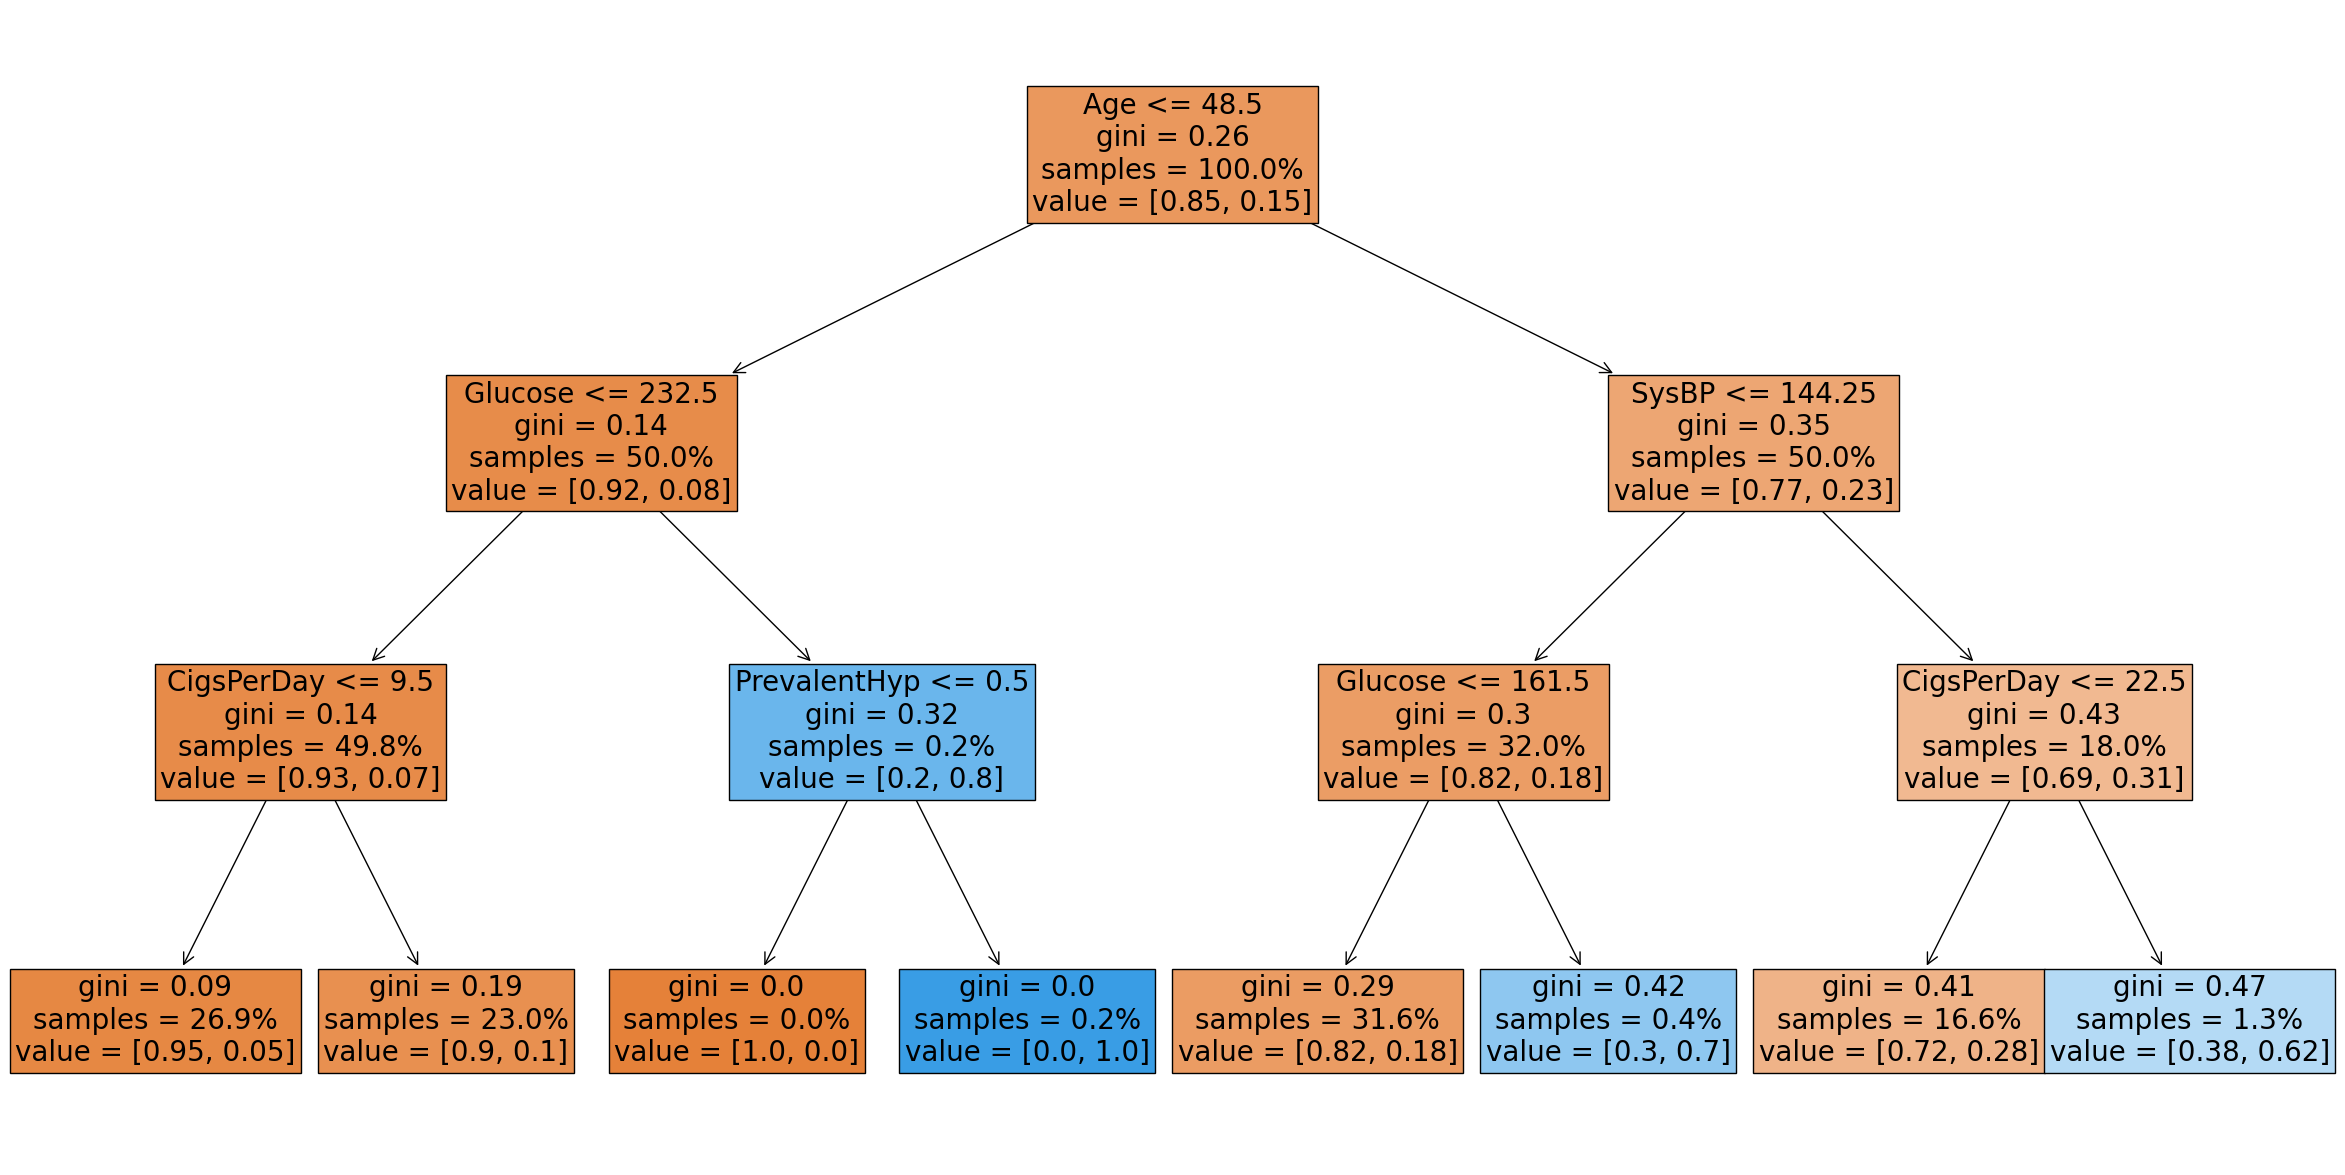

In [17]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

features = list(X_train)
plt.rcParams["figure.figsize"] = (30,15)
plot_tree(clf, feature_names=features, filled=True, fontsize=20, proportion=True, precision=2)
plt.show()

### Part (b)

In [18]:
y_pred = clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test,y_pred)

0.7015185525833403

### Part (c)

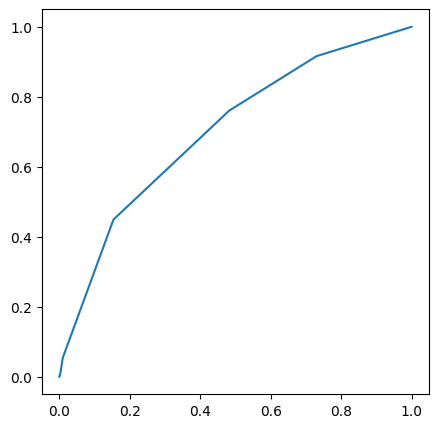

In [19]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(fpr,tpr)

In [20]:
print(fpr,tpr)

[0.         0.00322234 0.00966702 0.15359828 0.48227712 0.73039742
 1.        ] [0.         0.01197605 0.05389222 0.4491018  0.76047904 0.91616766
 1.        ]
